### What is Seaborn?

##### Seaborn gives us the capability to create amplified data visuals. This helps us understand the data by displaying it in a visual context to unearth any hidden correlations between variables or trends that might not be obvious initially. Seaborn has a high-level interface as compared to the low level of Matplotlib.


### Why should you use Seaborn versus matplotlib?

##### Seaborn makes our charts and plots look engaging and enables some of the common data visualization needs (like mapping color to a variable or using faceting). Basically, it makes the data visualization and exploration easy to conquer.

There are essentially a couple of (big) limitations in matplotlib that Seaborn fixes:

1. Seaborn comes with a large number of high-level interfaces and customized themes that
matplotlib lacks as it’s not easy to figure out the settings that make plots attractive

2. Matplotlib functions don’t work well with dataframes, whereas seaborn does

#### Setting up the Environment
T
he seaborn library has four mandatory dependencies you need to have:

● NumPy (>= 1.9.3)

● SciPy (>= 0.14.0)

● matplotlib (>= 1.4.3)

● Pandas (>= 0.15.2)

To install Seaborn and use it effectively, first, we need to install the aforementioned
dependencies. Once this step is done, we are all set to install Seaborn and enjoy its
mesmerizing plots. To install Seaborn, you can use the following line of codeTo install the latest release of seaborn, you can use pip:

pip install seaborn

You can also use conda to install the latest version of seaborn:
conda install seaborn

To import the dependencies and seaborn itself in your code, you can use the following code


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats

#### Datasets Used for Data Visualization

We’ll be working primarily with a dataset which are uploaded to your shared drive :

HR_Employee_Attrition_Data.csv

### Preparing the data

In [2]:
df_HR = pd.read_csv('HR_Employee_Attrition_Data.csv')

In [3]:
df_HR.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df_HR.shape

(2940, 35)

In [5]:
df_HR_num = df_HR.select_dtypes(include = 'number')
df_HR_cat = df_HR.select_dtypes(include = 'object')

In [6]:
print(df_HR_num.columns)
print(df_HR_cat.columns)

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')
Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


In [7]:
for x in df_HR_num.columns:
    if df_HR_num[x].nunique() < 5:
        print(f'Column {x} has {df_HR_num[x].nunique()} values')

Column EmployeeCount has 1 values
Column EnvironmentSatisfaction has 4 values
Column JobInvolvement has 4 values
Column JobSatisfaction has 4 values
Column PerformanceRating has 2 values
Column RelationshipSatisfaction has 4 values
Column StandardHours has 1 values
Column StockOptionLevel has 4 values
Column WorkLifeBalance has 4 values


In [8]:
df_HR_num.drop(['EmployeeCount', 'StandardHours'], inplace = True, axis = 1)

In [9]:
df_HR_num.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [10]:
for x in df_HR_cat.columns:
    if df_HR_cat[x].nunique() < 5:
        print(f'Column {x} has {df_HR_cat[x].nunique()} values')

Column Attrition has 2 values
Column BusinessTravel has 3 values
Column Department has 3 values
Column Gender has 2 values
Column MaritalStatus has 3 values
Column Over18 has 1 values
Column OverTime has 2 values


In [11]:
df_HR_cat.drop('Over18', inplace = True, axis = 1)

In [12]:
df_HR_cat.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

In [13]:
df_HR_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       2940 non-null   int64
 1   DailyRate                 2940 non-null   int64
 2   DistanceFromHome          2940 non-null   int64
 3   Education                 2940 non-null   int64
 4   EmployeeNumber            2940 non-null   int64
 5   EnvironmentSatisfaction   2940 non-null   int64
 6   HourlyRate                2940 non-null   int64
 7   JobInvolvement            2940 non-null   int64
 8   JobLevel                  2940 non-null   int64
 9   JobSatisfaction           2940 non-null   int64
 10  MonthlyIncome             2940 non-null   int64
 11  MonthlyRate               2940 non-null   int64
 12  NumCompaniesWorked        2940 non-null   int64
 13  PercentSalaryHike         2940 non-null   int64
 14  PerformanceRating         2940 non-null 

In [14]:
df_HR_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Attrition       2940 non-null   object
 1   BusinessTravel  2940 non-null   object
 2   Department      2940 non-null   object
 3   EducationField  2940 non-null   object
 4   Gender          2940 non-null   object
 5   JobRole         2940 non-null   object
 6   MaritalStatus   2940 non-null   object
 7   OverTime        2940 non-null   object
dtypes: object(8)
memory usage: 183.9+ KB


In [15]:
pd.set_option('display.max_columns', None)
df_HR_num.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,36.923810,802.485714,9.192517,2.912925,1470.500000,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.133819,403.440447,8.105485,1.023991,848.849221,1.092896,20.325969,0.711440,1.106752,1.102658,4707.155770,7116.575021,2.497584,3.659315,0.360762,1.081025,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,735.750000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8045.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1470.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,2205.250000,4.000000,84.000000,3.000000,3.000000,4.000000,8380.000000,20462.000000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,2940.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [16]:
df_HR_cat.describe()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
count,2940,2940,2940,2940,2940,2940,2940,2940
unique,2,3,3,6,2,9,3,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,No
freq,2466,2086,1922,1212,1764,652,1346,2108


###### Note above the difference between the output of describe function on Numerical(statistical) data and categorical data. For numerical data, output is statistical values like mean, std, min, max and percentiles. While for categorical data we have unique, top frequency level and the frequency count.

#### Data Visualization using Seaborn

This implementation section is divided into two categories:

● Visualizing statistical relationships

● Plotting categorical data

We’ll look at multiple examples of each category and how to plot it using seaborn.

#### Visualizing statistical relationships

A statistical relationship denotes a process of understanding relationships between different
variables in a dataset and how that relationship affects or depends on other variables.

#### Scatterplot using Seaborn

A scatterplot is perhaps the most common example of visualizing relationships between two
variables. Each point shows an observation in the dataset and these observations are
represented by dot-like structures. The plot shows the joint distribution of two variables using a
cloud of points.To draw the scatter plot, we’ll be using the relplot() function of the seaborn
library. It is a figure-level role for visualizing statistical relationships. By default, using a relplot
produces a scatter plot:

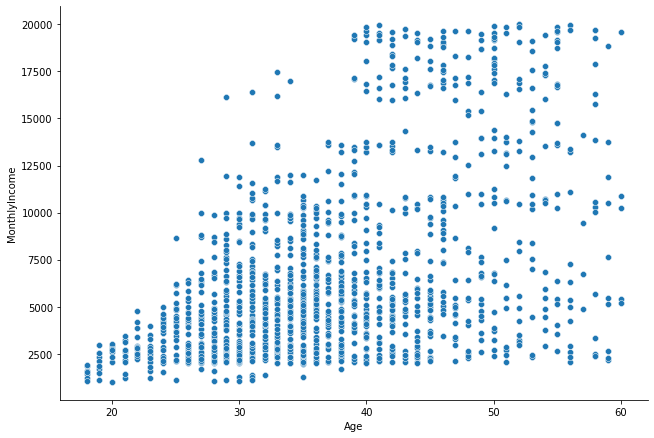

In [17]:
sns.relplot(x = 'Age', y = 'MonthlyIncome', data = df_HR_num, height = 6, aspect = 1.5)
plt.show()

Note above how we used the height parameter to specify the height instead of plt.figure(figsize). Aspect is the ratio of width to height i.e height of 8 * aspect ratio of 1.5 gives a width of 12. 

Many (if not most) plot functions in seaborn take height and aspect as parameters for setting the dimensions of the plot.

In [80]:
df_HR

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2936,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
2936,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2937,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
2937,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2938,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
2938,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2939,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


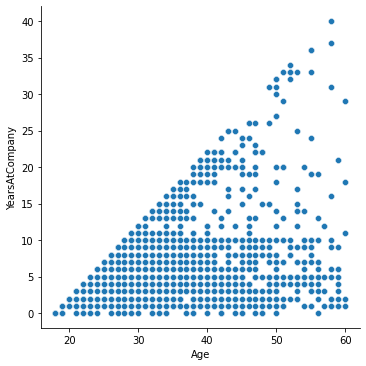

In [95]:
sns.relplot(x = df_HR['Age'], y = df_HR['YearsAtCompany'])

The above graph is only meant to show some of the options available on the seaborn relplot(). 

We have plotted the ages on x axis and YearsAtCompany on Y axis.

Then we have bifurcated them further using the size parameter on JobLevel. The higher the value of JobLevel the bigger the size of the symbol(which we have changed - used different symbols for different levels in the 'PercentSalaryHike' column).

Then we have bifurcated them further on 'JobSatisfaction' using the hue parameter. Here we have also specified the palette of colors to be used. More on Seaborns palettes can be found here : 

https://seaborn.pydata.org/tutorial/color_palettes.html

Finally, we have again bifurcated this information using different symbols in the 'style' parameter on 'PercentSalaryHike'.

Seaborn has various parameters for each plot - for e.g. the symbols in the style parameter can be ordered as per our requirement. The acceptable markers will probably be the same as for matplotlib shared in the matplotlib class. As you go through your projects and evolution as a Data Scientist, feel free to experiment and research on these further parameters. You will eventually build your go-to or preferred options and parameters and mostly re-use these. However, it is always good to know of the other available options.


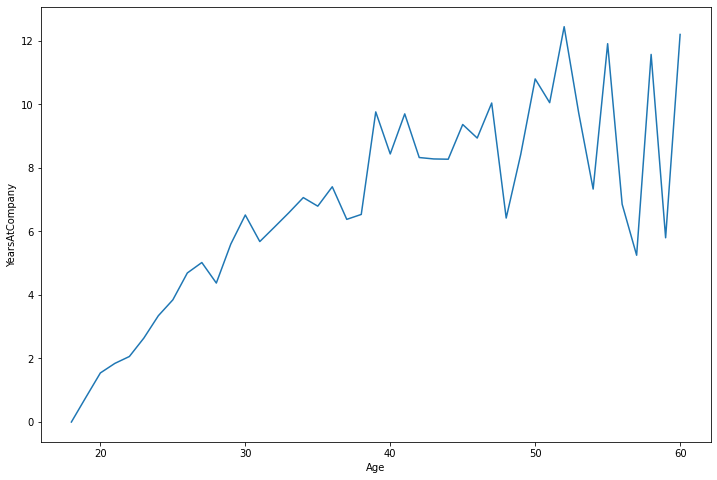

In [101]:
plt.figure(figsize = (12,8))
sns.lineplot(data = df_HR, x = 'Age', y = 'YearsAtCompany', ci=None)
plt.show()

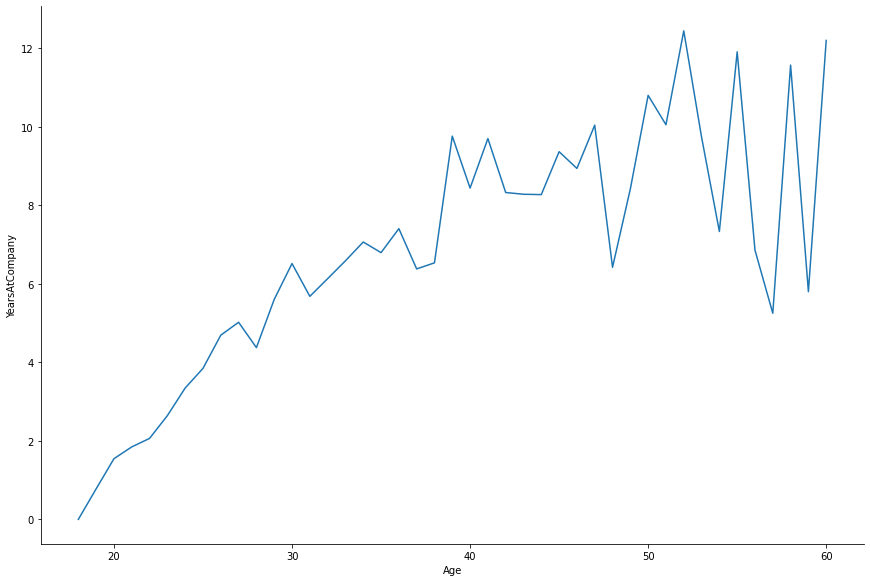

In [19]:
sns.relplot(data = df_HR, x = 'Age', y = 'YearsAtCompany', height = 8, aspect = 1.5, kind = 'line', ci = None)
plt.show()

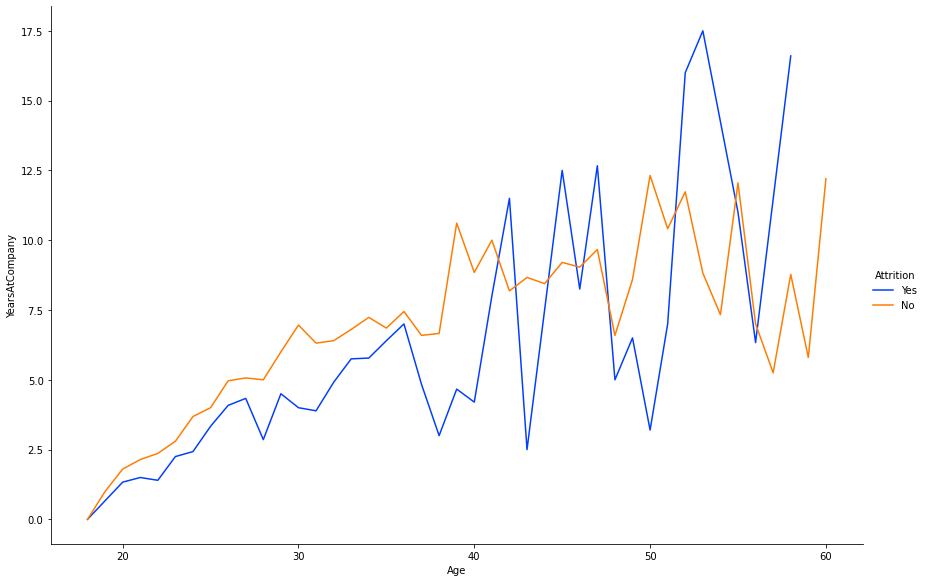

In [102]:
sns.relplot(data = df_HR, x = 'Age', y = 'YearsAtCompany', height = 8, aspect = 1.5, \
sizes = (10,150), hue = 'Attrition', palette = 'bright', kind = 'line', ci = None)
plt.show()


By changing the kind to 'line' we can use sns.relplot() function to draw line plots. Seaborn also has scatterplot() and lineplot() functions to draw these same plots. The parameters remain the same.

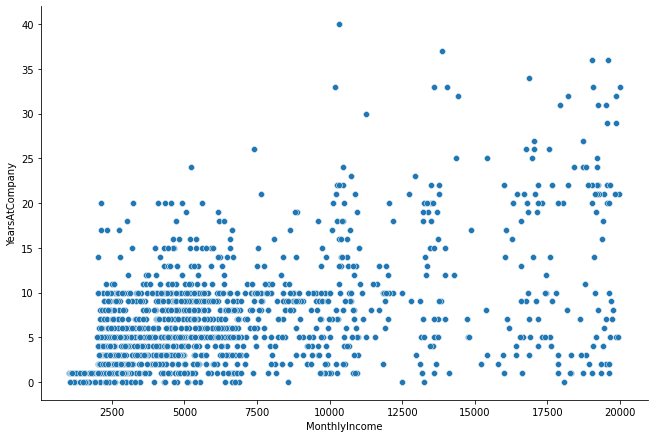

In [21]:
sns.relplot(x = 'MonthlyIncome', y = 'YearsAtCompany', data = df_HR_num, height = 6, \
            aspect = 1.5, palette = 'bright')
plt.show()

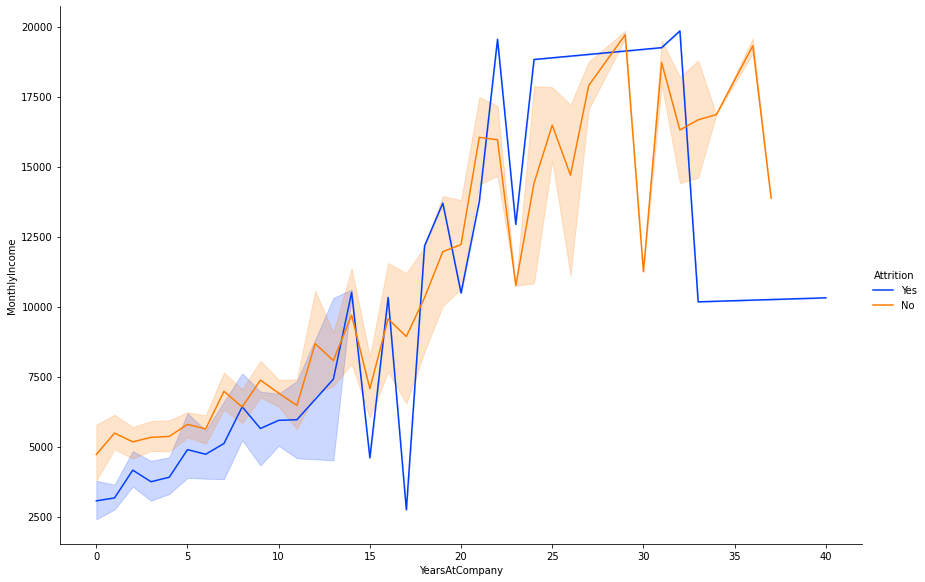

In [22]:
sns.relplot(data = df_HR, x = 'YearsAtCompany', y = 'MonthlyIncome', height = 8, aspect = 1.5, hue = 'Attrition', \
            palette = 'bright', kind = 'line')
plt.show()


#### lmplot()

The lmplot() function in seaborn plots a scatterplot with a regression line overlaid.

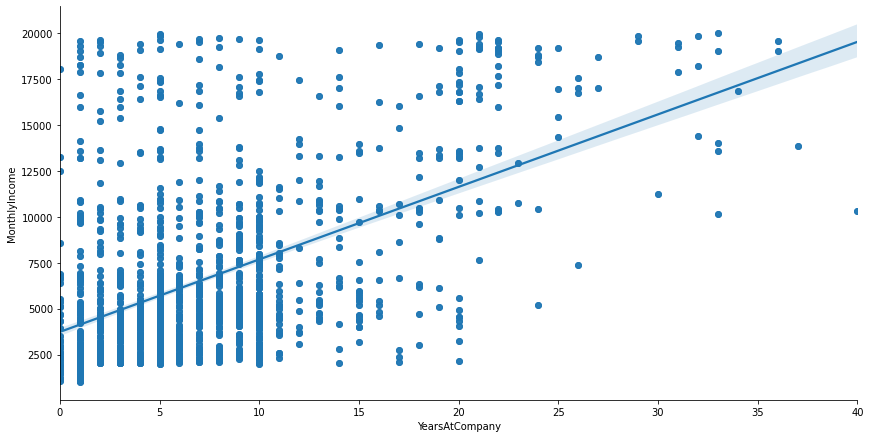

In [23]:
sns.lmplot(data = df_HR, x = 'YearsAtCompany', y = 'MonthlyIncome', height = 6, aspect = 2)

<AxesSubplot:xlabel='YearsAtCompany', ylabel='MonthlyIncome'>

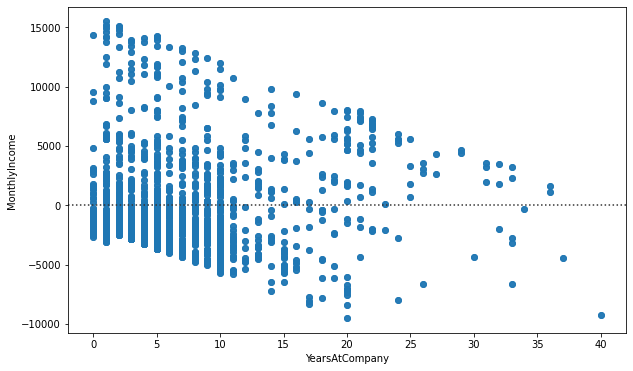

In [106]:
plt.figure(figsize = (10,6))
sns.residplot(data = df_HR, x = 'YearsAtCompany', y = 'MonthlyIncome')

#### Plotting Categorical Data

In the above section, we saw how we can use different visual representations to show the
relationship between multiple variables. We drew the plots between two numeric variables. In
this section, we’ll see the relationship between two variables of which one would be categorical
(divided into different groups).
We’ll be using the catplot() function of the seaborn library to draw the plots of categorical data. Previously this was factorplot(but default to scatterplot) - now factorplot() is less used.

In [24]:
df_HR.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


##### catplot


In [1]:
sns.catplot(x = 'Attrition', y = 'YearsAtCompany', data = df_HR,jitter=false)
plt.show()

NameError: name 'sns' is not defined

The above is a striplot (also called jitterplot) showing the points on the plot corresponding to x and y values. The points are scattered across the y dimension because they are deviating from the true X value (i.e. Jittering) so that they dont overlap completely. If we set jitter to false, they will be plotted on the true X value and we will see only one point for every y point on x tick.

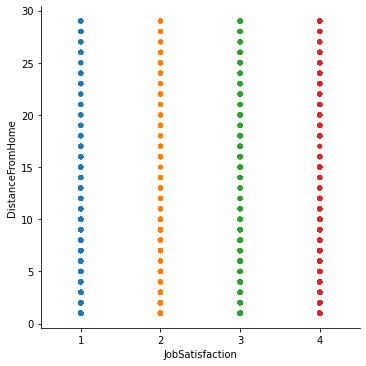

In [26]:
sns.catplot(x = 'JobSatisfaction', y = 'DistanceFromHome', data = df_HR, jitter = False)
plt.show()

The kind parameter in catplot - takes the following non-default values. 


"strip" - default, seen above Default func = sns.stripplot()

"swarm" - similar to jitter = True but the points are even more spread apart across the y-axis. Direct func - sns.swarmplot()

"box"  - Shows the statistical representation of the chosen y across the x ticks. Shows the outlier points, positive 1.5
IQR, negative 1.5 IQR, 25%, 50% Mean, 75% values in the box which represents the IQR. Direct func - sns.boxplot()

"violin" - Distribution of the y points across the x ticks. Shows the box plot in the center of each plot. Distribution is mirrored on both sides of the center of the plot. Direct func - sns.violinplot()

"point" - Shows the point estimate as a point for each x tick and the level of uncertainity around that point estimate is shown by the lines above and below the point estimate - default is mean. Direct func - sns.pointplot()

"bar" - Bar plot - Direct func - sns.barplot()

"count" - Count Plot - Frequency of X. Direct func - sns.countplot()

From the documentation of catplot, we can see that each of these 'kind' parameters also have their own function plots i.e.

instead of calling sns.catplot(data, x, y, kind = 'swarm') we could call

sns.swarmplot(data, x, y) with the same parameters.

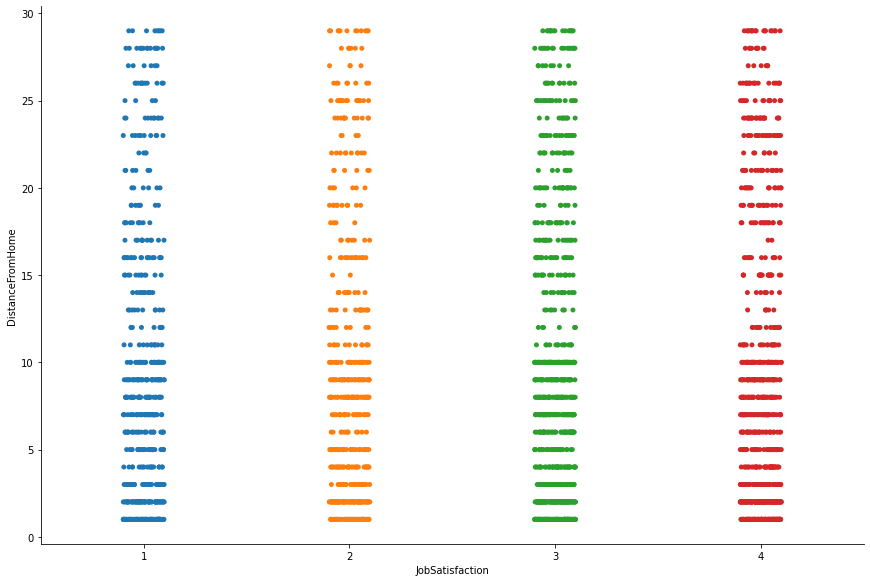

In [113]:
sns.catplot(x = 'JobSatisfaction', y = 'DistanceFromHome', data = df_HR, kind = 'strip', height = 8, aspect = 1.5)
plt.show()

C:\Users\Vikas\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 28.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Vikas\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 26.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Vikas\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 44.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Vikas\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 47.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


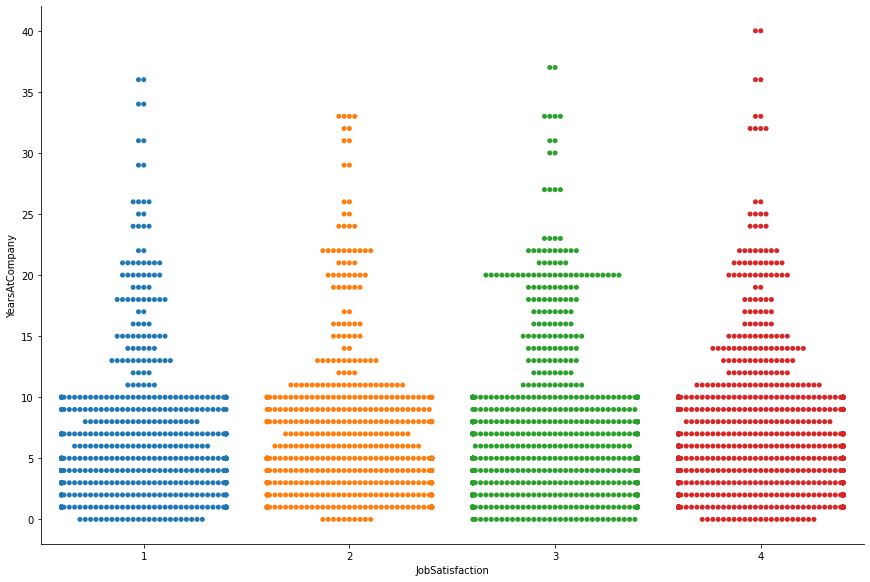

In [112]:
sns.catplot(x = 'JobSatisfaction', y = 'YearsAtCompany', data = df_HR, kind = 'swarm', height = 8, aspect = 1.5)
plt.show()

C:\Users\Vikas\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 16.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Vikas\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Vikas\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 35.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Vikas\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 38.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


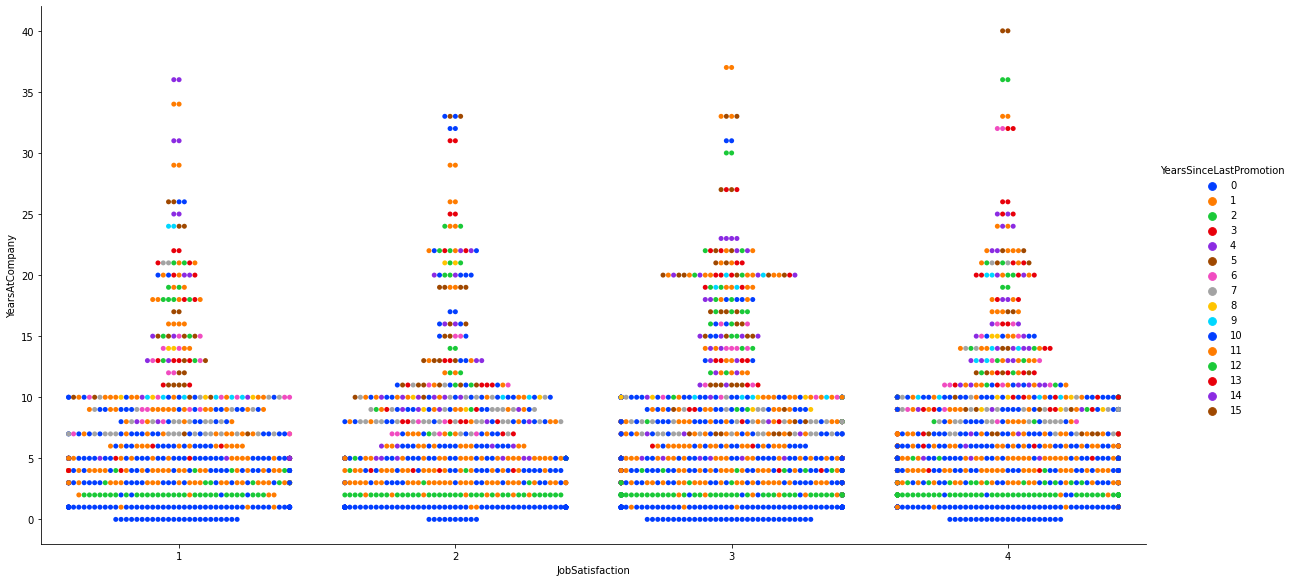

In [116]:
sns.catplot(x = 'JobSatisfaction', y = 'YearsAtCompany', hue = 'YearsSinceLastPromotion', data = df_HR, kind = 'swarm', \
            height = 8, aspect = 2, palette = 'bright')
plt.show()

Above we added a third dimension to our plot by adding 'hue' = 'YearsSinceLastPromotion'

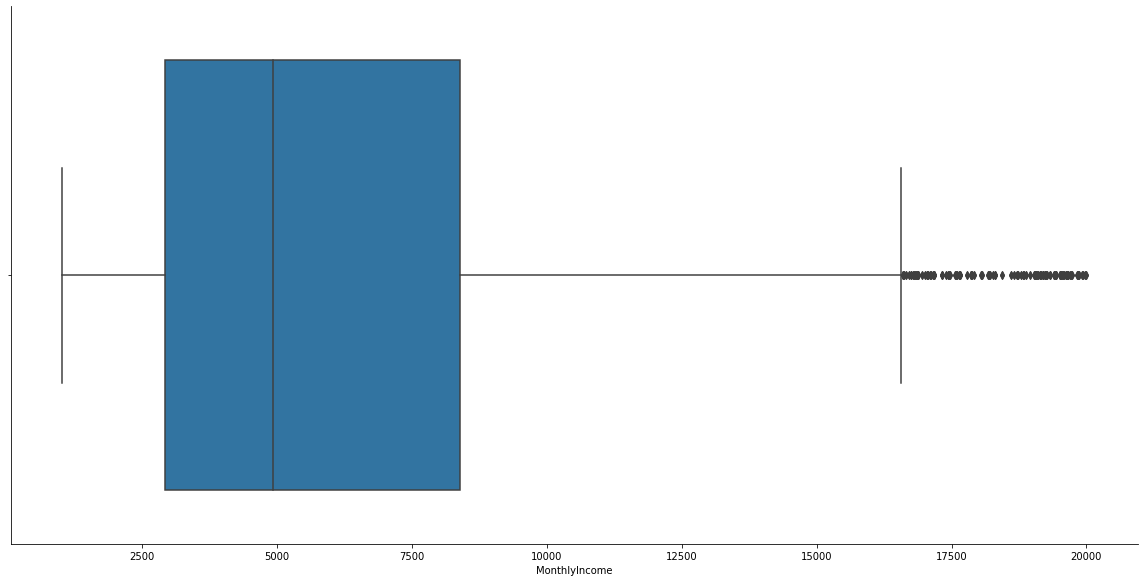

In [117]:
sns.catplot(x = 'MonthlyIncome', data = df_HR, kind = 'box', height = 8, aspect = 2)
plt.show()

##### Violin plots

The violin plots combine the boxplot and kernel density estimation procedure to provide richer
description of the distribution of values. The quartile values are displayed inside the violin.

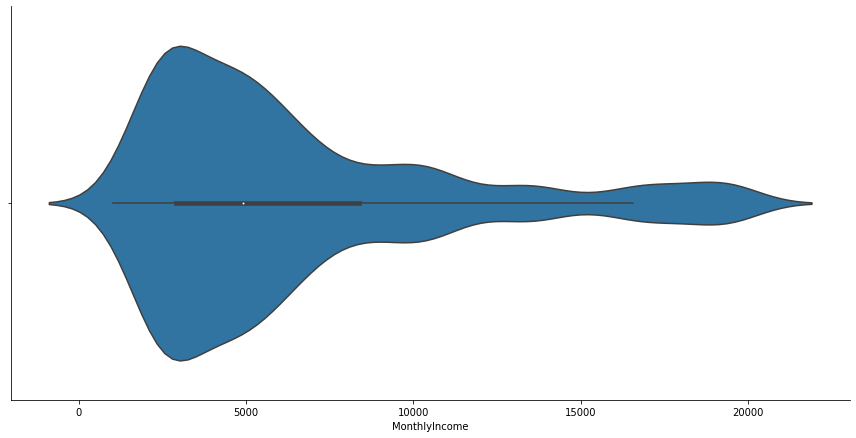

In [120]:
sns.catplot(x = 'MonthlyIncome', data = df_HR, kind = 'violin', height = 6, aspect = 2)
plt.show()

We can also overlay one plot over another as we did with matplotlib. But for this we need the figure object of matplotlib.

C:\Users\Vikas\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 17.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Vikas\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 30.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Vikas\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 31.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


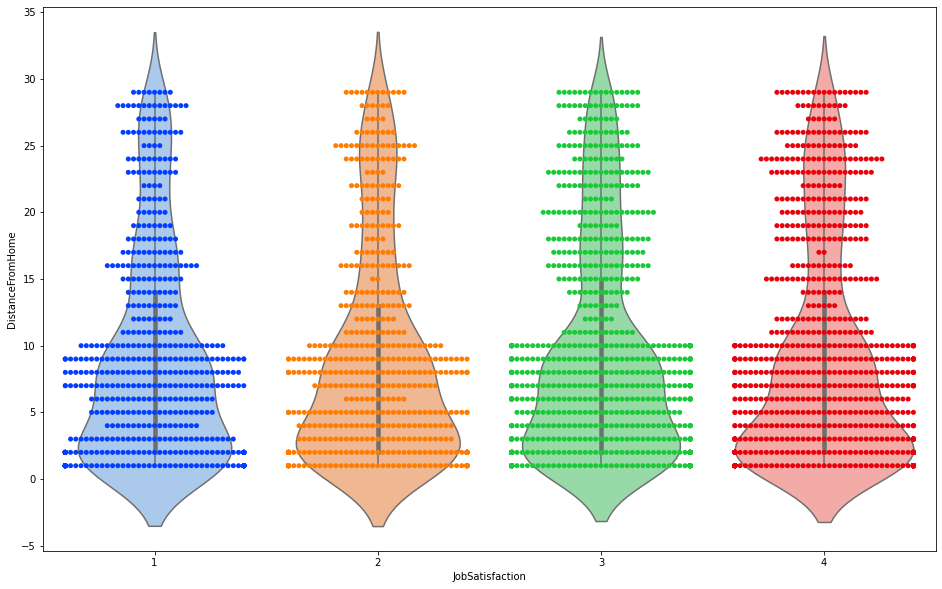

In [32]:
plt.figure(figsize = (16,10))
sns.violinplot(x = 'JobSatisfaction', y = 'DistanceFromHome', data = df_HR, palette = 'pastel')
sns.swarmplot(x = 'JobSatisfaction', y = 'DistanceFromHome', data = df_HR, palette = 'bright')
plt.show()


The different kinds of color palettes available in Seaborn can be accessed here. 

https://seaborn.pydata.org/tutorial/color_palettes.html

And we can use the sns.palplot() function to view these palettes.

In [33]:
palettePastel = sns.color_palette('pastel')
paletteDeep = sns.color_palette('deep')
paletteSet2 = sns.color_palette('Set2')
paletteMako = sns.color_palette('mako')
paletteMakoSeq = sns.color_palette("mako", as_cmap=True)

TypeError: object of type 'ListedColormap' has no len()

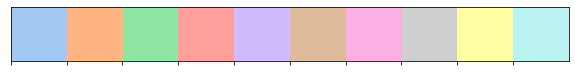

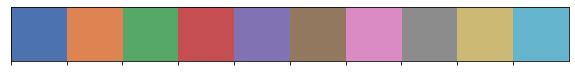

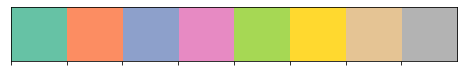

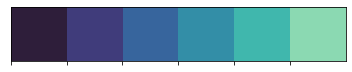

In [121]:
sns.palplot(palettePastel)
sns.palplot(paletteDeep)
sns.palplot(paletteSet2)
sns.palplot(paletteMako)
sns.palplot(paletteMakoSeq)

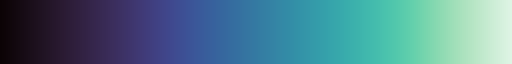

In [36]:
sns.color_palette('mako', as_cmap = True)

We can also split the violin when the hue semantic parameter has only two levels, which could also
be helpful in saving space on the plot. In the below plot we are adding a dimension 'Attrition' (which has two levels - Yes/No). But we get 8 plots now instead of the original 4 plots.

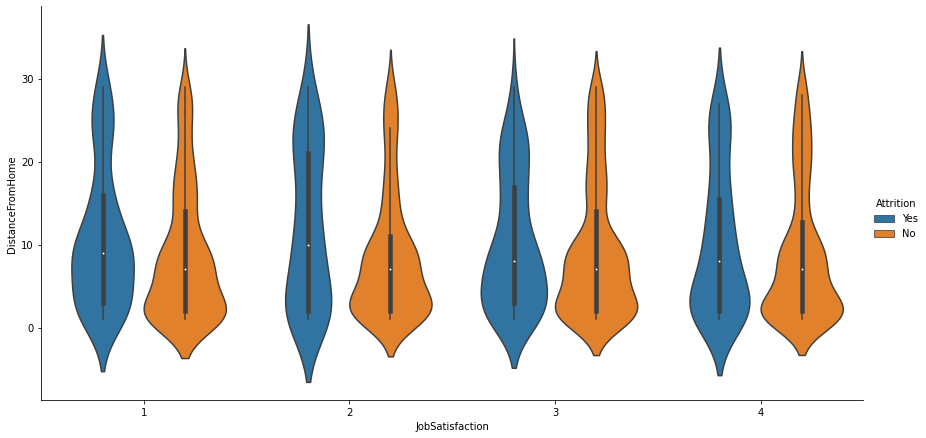

In [37]:
sns.catplot(x = 'JobSatisfaction', y = 'DistanceFromHome', hue = 'Attrition', data = df_HR, kind = 'violin', height = 6,\
            aspect = 2)
plt.show()

By setting the split parameter to true - we can get the distributions of Attrition - Yes, Attrition - No on both sides of the plot.

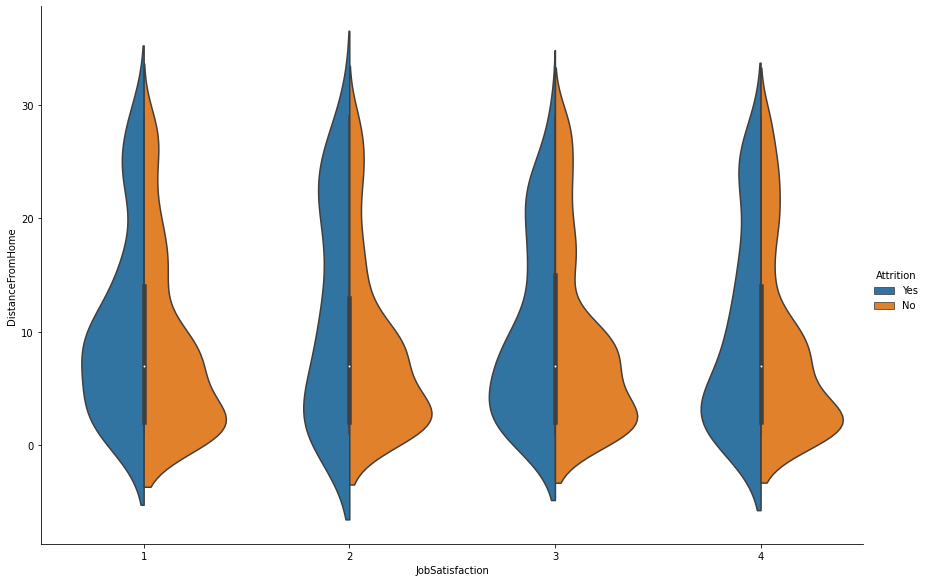

In [38]:
sns.catplot(x = 'JobSatisfaction', y = 'DistanceFromHome', hue = 'Attrition', data = df_HR, kind = 'violin', height = 8,\
            aspect = 1.5, split = True)
plt.show()

However, we are only getting one box plot in the center for the overall attrition. We can rectify this by adding the inner = 'quartile' parameter. Now it will show us the lines on each distribution showing the 25%, 50%(median) and 75% of the distribution. 

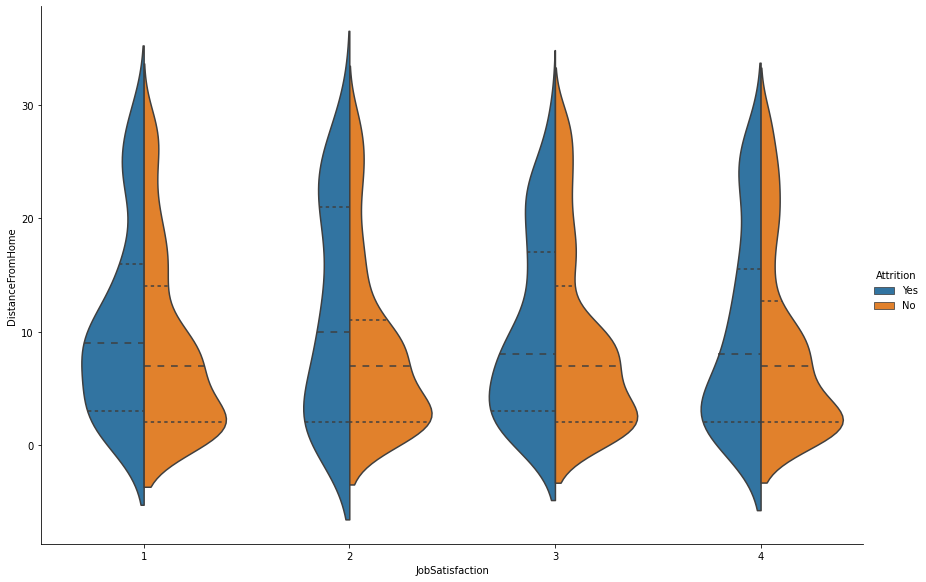

In [39]:
sns.catplot(x = 'JobSatisfaction', y = 'DistanceFromHome', hue = 'Attrition', data = df_HR, kind = 'violin', height = 8,\
            aspect = 1.5, split = True, inner = 'quartile')
plt.show()

##### Pointplot

Pointplot connects data from the same hue category. This helps in
identifying how the relationship is changing in a particular hue category. 

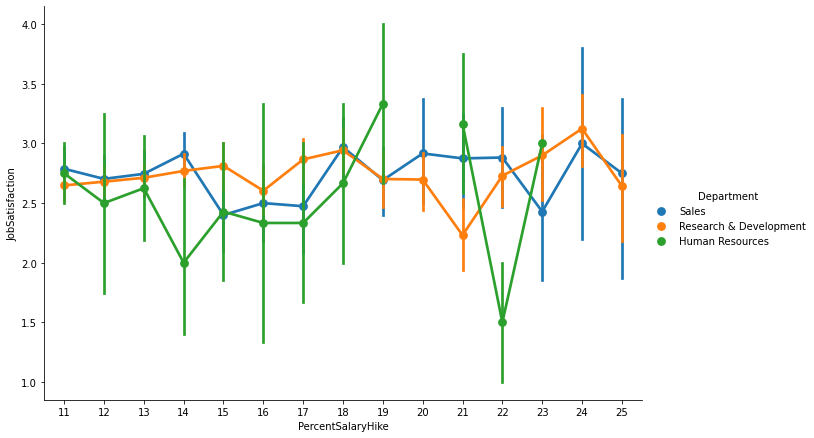

In [125]:
sns.catplot(x = 'PercentSalaryHike', y = 'JobSatisfaction', hue = 'Department', data = df_HR, kind = 'point', height = 6,\
           aspect = 1.5)
plt.show()

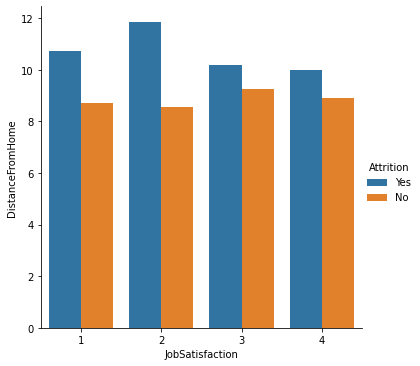

In [126]:
sns.catplot(x = 'JobSatisfaction', y = 'DistanceFromHome', hue = 'Attrition', data = df_HR, kind = 'bar', ci = None)
plt.show()

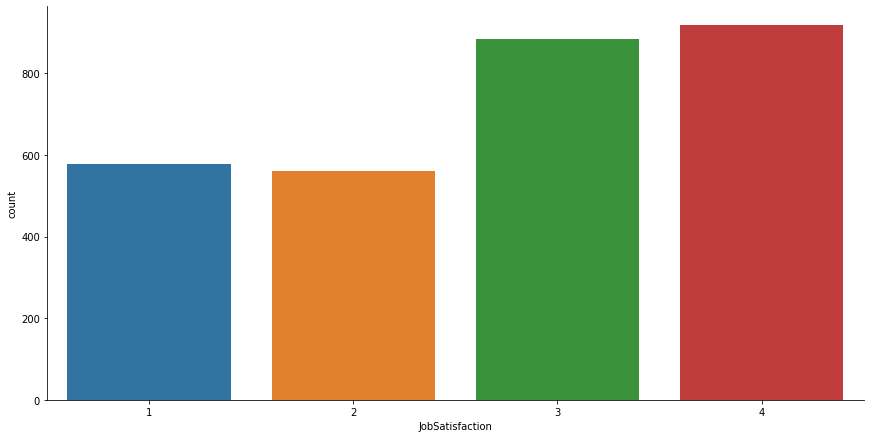

In [42]:
sns.catplot(x = 'JobSatisfaction', data = df_HR, kind = 'count',height = 6, aspect = 2)
plt.show()

Using seaborn we can visualise higher dimension relationships as well with the 'col' parameter

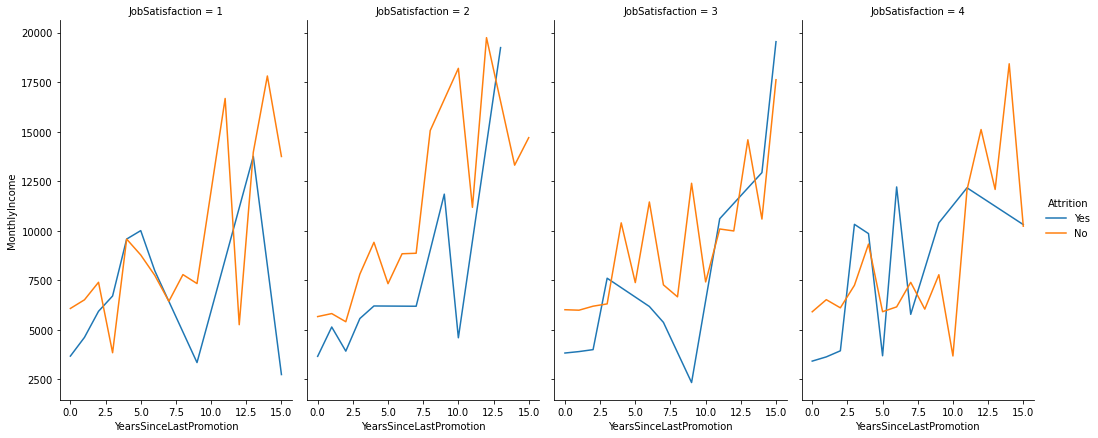

In [43]:
sns.relplot(data = df_HR, x = 'YearsSinceLastPromotion', y = 'MonthlyIncome', hue = 'Attrition', col = 'JobSatisfaction',\
           kind = 'line', height = 6, aspect = 0.6, ci= None)
plt.show()

In [44]:
df_HR.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


#### Visualizing the Distribution of a Dataset

##### Univariate distributions - Histograms

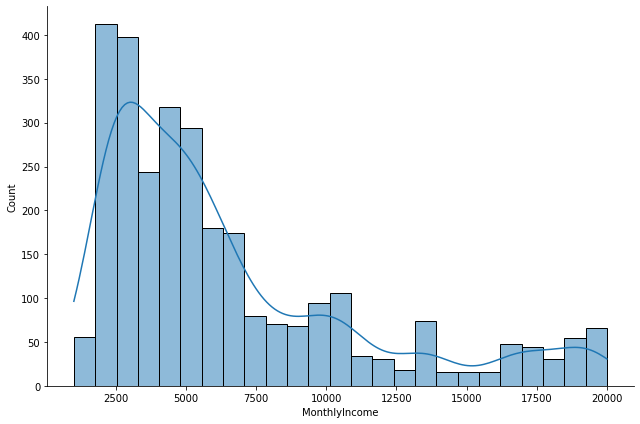

In [128]:
sns.displot(data = df_HR, x = 'MonthlyIncome', height = 6, aspect = 1.5, kde = True)

As with relplot and catplot, the kind parameter for displot takes the following inputs:

hist - Data is divided into bins. This is the default. Direct function histplot()

kde - Kernel Density Estimator - Probability estimate of a random variable. We can choose kde = True in a histplot to get both the kde and histogram bars. Direct function kdeplot(). 

ecdf - For visualising each of the datapoints in a cumulative manner. Explanation below. Direct func = ecdfplot()

rugplot - Can either be used with other distribution plots with rug = True or drawn seperately with rugplot(). Draws ticks along the x axis for each datapoint thereby the density at different points in the data can be analyzed.

Please remember that these graphs are for Univariate distributions.

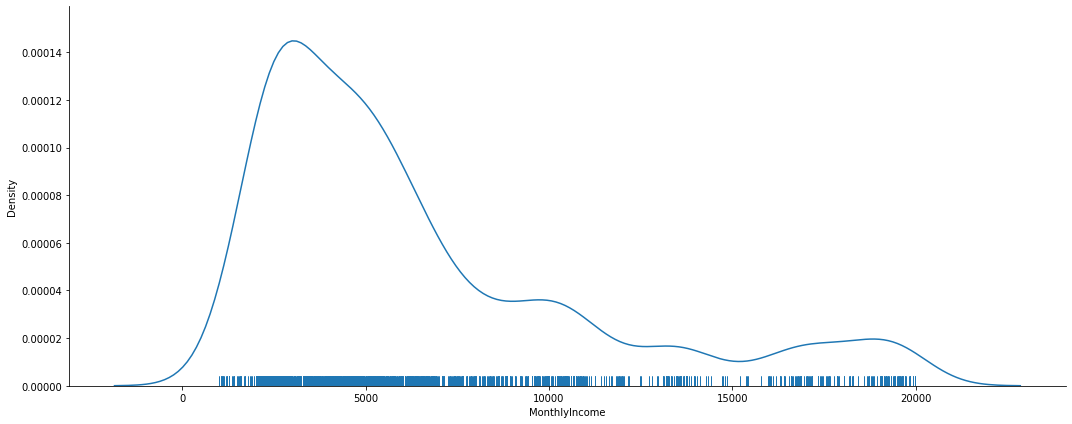

In [46]:
sns.displot(data = df_HR, x = 'MonthlyIncome', height = 6, aspect = 2.5, kind = 'kde', rug = True)

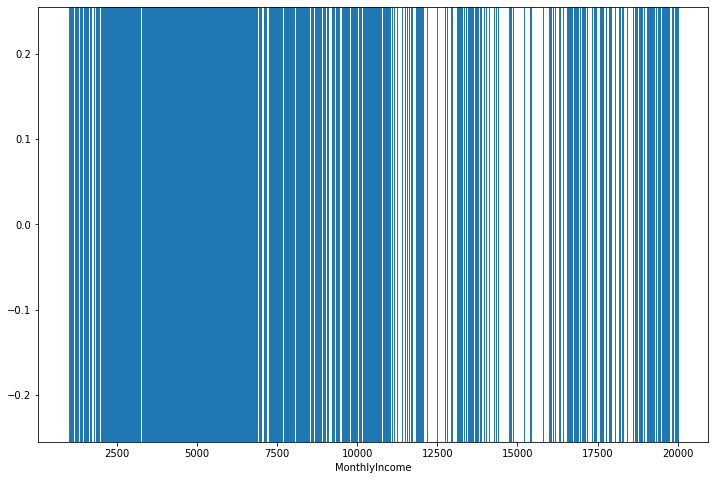

In [131]:
plt.figure(figsize = (12,8))
sns.rugplot(data = df_HR, x = 'MonthlyIncome', height = 1)
plt.show()

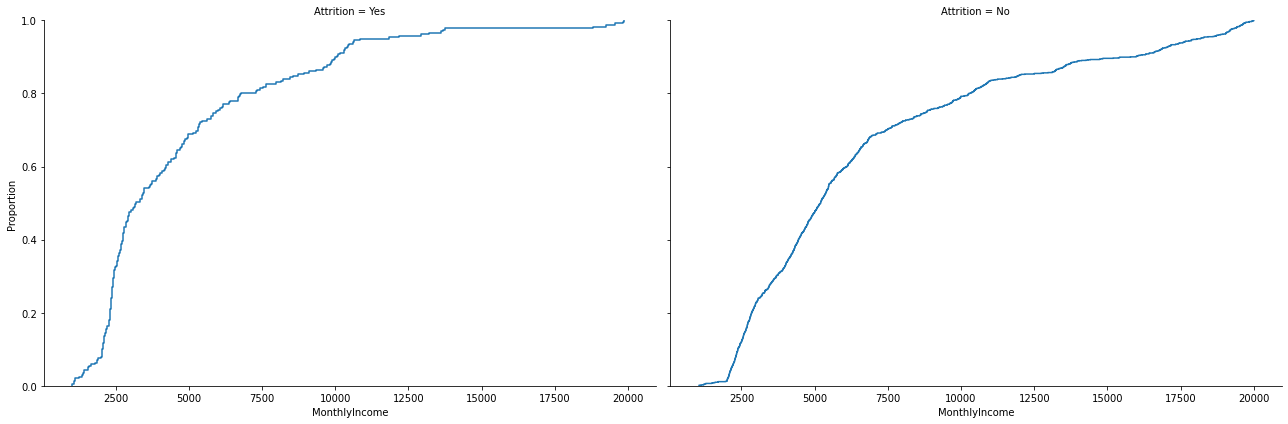

In [47]:
sns.displot(data = df_HR, x = 'MonthlyIncome', height = 6, aspect = 1.5, kind = 'ecdf', col = 'Attrition')

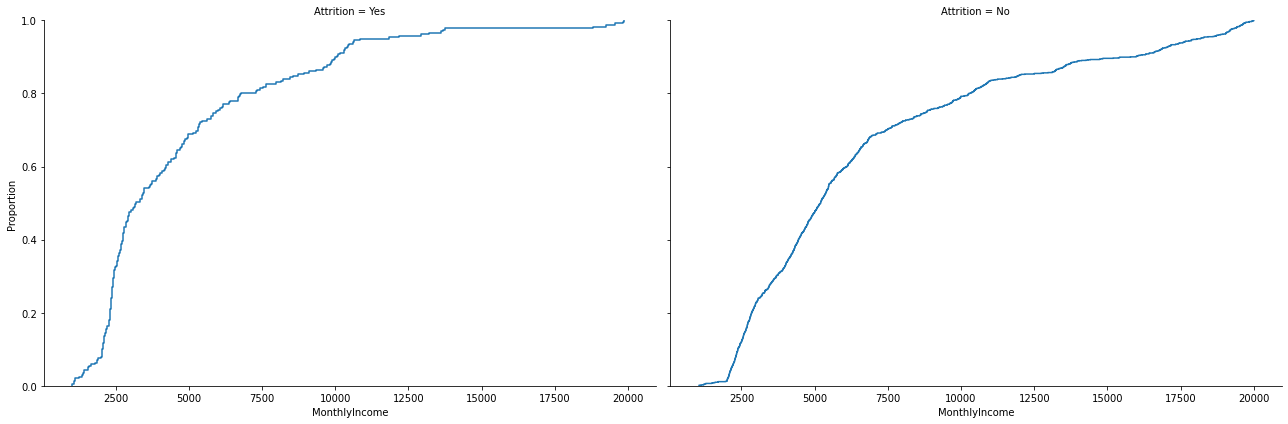

In [48]:
sns.displot(data = df_HR, x = 'MonthlyIncome', height = 6, aspect = 1.5, kind = 'ecdf', col = 'Attrition')

ECDF stands for Empirical Commutative Distribution. The ECDF plot visualizes each and every data point of the dataset directly in a cumulative manner.

This plot contains more information because it has no bin size setting, which means it doesn’t have any smoothing parameters.

Since its curves are monotonically increasing, so it is well suited for comparing multiple distributions at the same time.
In an ECDF plot, the x-axis corresponds to the range of values for the variable whereas the y-axis corresponds to the proportion of data points that are less than or equal to the corresponding value of the x-axis.

### Plotting Bivariate Distributions

Apart from visualizing the distribution of a single variable, we can see how two independent
variables are distributed with respect to each other. Bivariate means joint, so to visualize it, we
use the jointplot() function of seaborn library. By default, jointplot draws a scatter plot.

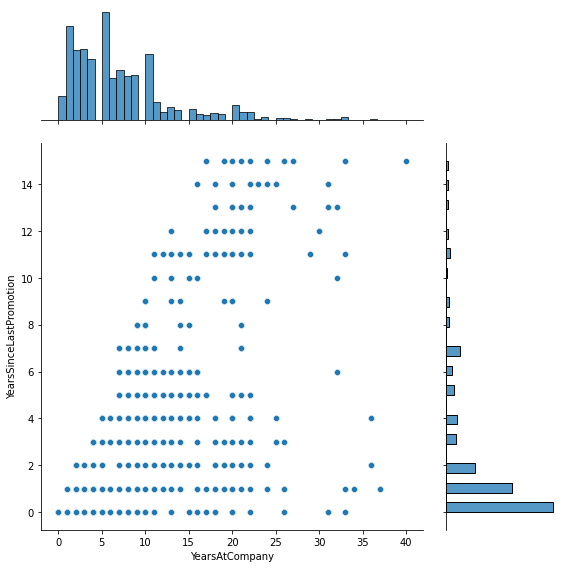

In [49]:
sns.jointplot(data = df_HR, x = 'YearsAtCompany', y = 'YearsSinceLastPromotion', height = 8, ratio = 3)
plt.show()

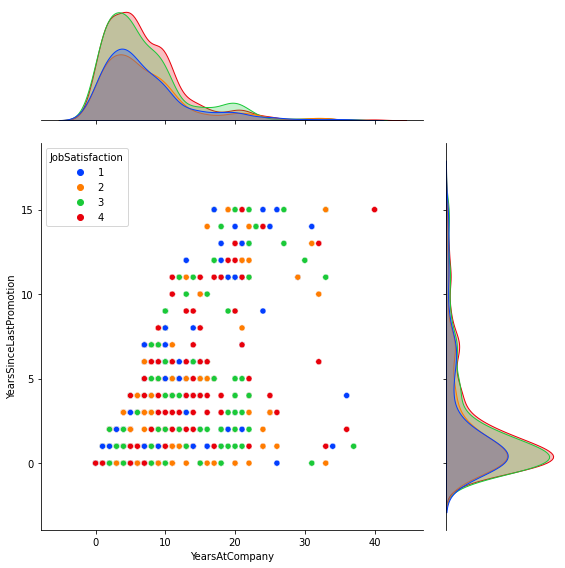

In [50]:
sns.jointplot(data = df_HR, x = 'YearsAtCompany', y = 'YearsSinceLastPromotion', height = 8, ratio = 3, \
             hue = 'JobSatisfaction', palette = 'bright')
plt.show()

Kind parameter takes the following values:
    
scatter - Default of jointplot

kde - Using a Kernel density estimator as the joint axis(main box in the above plots). 

hist - Using Histogram as the joint axis

hex - Hexplot is a bivariate analog of histogram as it shows the number of observations that fall within

hexagonal bins. This is a plot which works with a large dataset very easily

reg - Is used to plot the data along with a linear regression model fit. The line across the graph is the 'line of best fit' which we shall learn further about in the Stats and ML module. Direct func - regplot()

resid - This method is used to plot the residuals of the linear regression model which we shall learn about in Stats and ML. The line of best fit is the dotted line through 0 on the y axis in the graph with residuals on either side. Direct func = residplot()

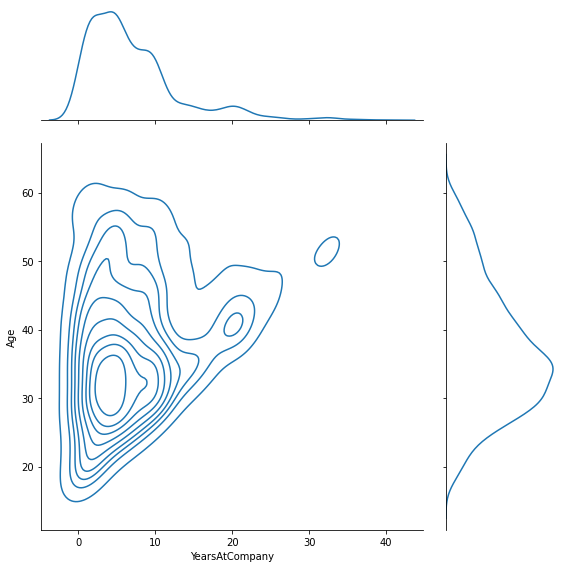

In [51]:
sns.jointplot(data = df_HR, x = 'YearsAtCompany', y = 'Age', height = 8, ratio = 3, kind = 'kde')
plt.show()

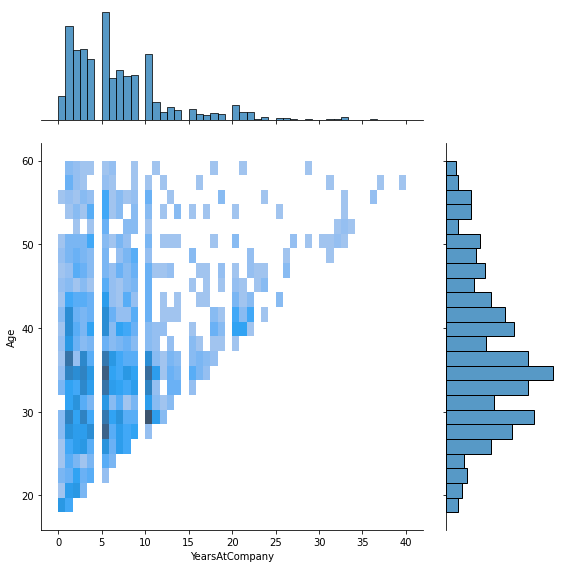

In [52]:
sns.jointplot(data = df_HR, x = 'YearsAtCompany', y = 'Age', height = 8, ratio = 3, kind = 'hist')
plt.show()

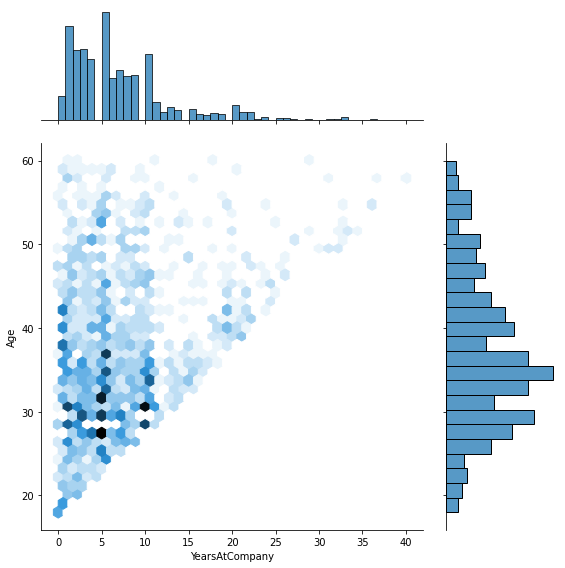

In [53]:
sns.jointplot(data = df_HR, x = 'YearsAtCompany', y = 'Age', height = 8, ratio = 3, kind = 'hex')
plt.show()

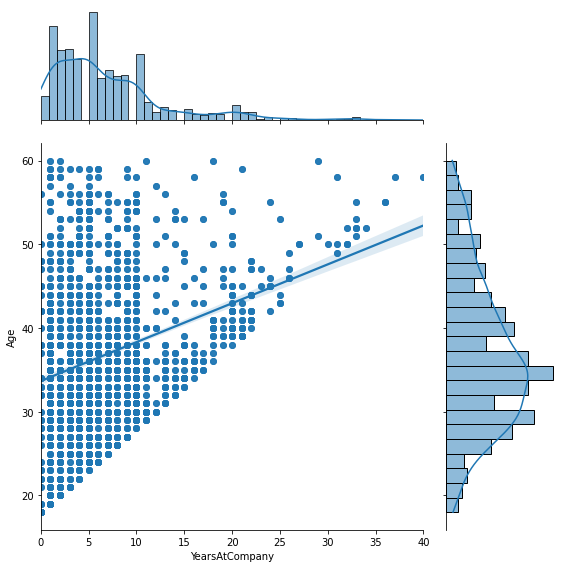

In [54]:
sns.jointplot(data = df_HR, x = 'YearsAtCompany', y = 'Age', height = 8, ratio = 3, kind = 'reg')
plt.show()

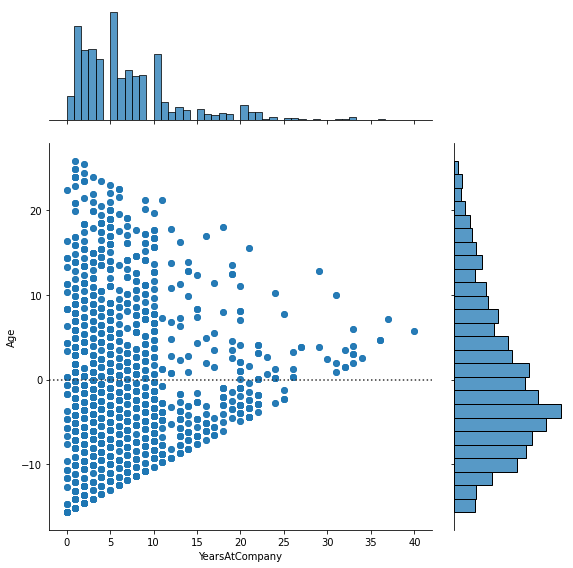

In [55]:
sns.jointplot(data = df_HR, x = 'YearsAtCompany', y = 'Age', height = 8, ratio = 3, kind = 'resid')
plt.show()

### Other maps in Seaborn

In [56]:
df_HR_num.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,36.923810,802.485714,9.192517,2.912925,1470.500000,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.133819,403.440447,8.105485,1.023991,848.849221,1.092896,20.325969,0.711440,1.106752,1.102658,4707.155770,7116.575021,2.497584,3.659315,0.360762,1.081025,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,735.750000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8045.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1470.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,2205.250000,4.000000,84.000000,3.000000,3.000000,4.000000,8380.000000,20462.000000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,2940.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [57]:
df_HR_num.drop('EmployeeNumber', inplace = True, axis = 1)

In [58]:
df_HR_num.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.133819,403.440447,8.105485,1.023991,1.092896,20.325969,0.711440,1.106752,1.102658,4707.155770,7116.575021,2.497584,3.659315,0.360762,1.081025,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8045.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,84.000000,3.000000,3.000000,4.000000,8380.000000,20462.000000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Heatmaps

Heatmaps are graphical representations of data which use color-coding to show different values. Usually, they are used to show values that are between a certain scale and the change in the hue of a single color makes it easier to identify the higher and lower values. 

Of course, we have a choice of using multi-colors in cmap to represent the data but it usually isnt as clear to analyze.

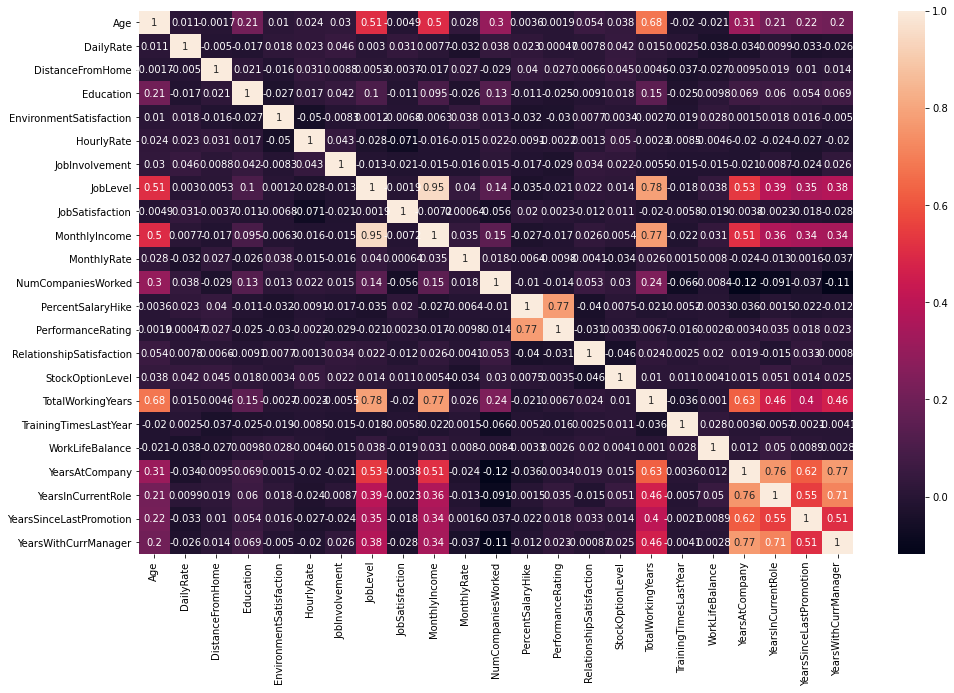

In [135]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_HR_num.corr(), annot = True, cmap = sns.color_palette('rocket', as_cmap=True))
plt.show()

Above we have taken the correlation of each column with other columns (-1 representing perfect inverse correlation, 0 meaning no correlation, 1 meaning perfect positive correlation). So, the data is between the scale -1 to 1. And is easily identified by the darkening of the Blue color for positive correlation and lightening for negative correlation.

#### Boxen Plot using Seaborn

Another plot that we can use to show the bivariate distribution is the boxen plot. Boxen plots
were originally named letter value plots as it shows a large number of values of a variable, also
known as quantiles. These quantiles are also defined as letter values. By plotting a large
number of quantiles, it provides more insights about the shape of the distribution. These are
similar to box plots.

We can draw these plots using catplot() with kind 'boxen' or directly by calling boxenplot()

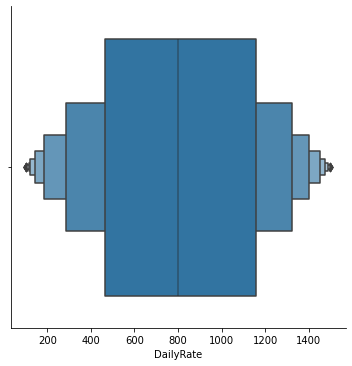

In [60]:
sns.catplot(data = df_HR, x = 'DailyRate', kind = 'boxen', )

#### Visualizing Pairwise Relationships in a Dataset

We can also plot multiple bivariate distributions in a dataset by using the pairplot() function of
the seaborn library. This shows the relationship between each column of the database. It also
draws the univariate distribution plot of each variable on the diagonal axis. Let’s see how it
looks.

In [61]:
df_HR_num.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [62]:
df_HR_num2 = df_HR_num[['Age', 'HourlyRate', 'JobSatisfaction', 'NumCompaniesWorked', 'PerformanceRating', 'StockOptionLevel',\
'TotalWorkingYears', 'TrainingTimesLastYear','WorkLifeBalance', 'YearsWithCurrManager']].copy()

In [63]:
df_HR_num2.head()

,Age,HourlyRate,JobSatisfaction,NumCompaniesWorked,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsWithCurrManager
0,41,94,4,8,3,0,8,0,1,5
1,49,61,2,1,4,1,10,3,3,7
2,37,92,3,6,3,0,7,3,3,0
3,33,56,3,1,3,0,8,3,3,0
4,27,40,2,9,3,1,6,3,3,2


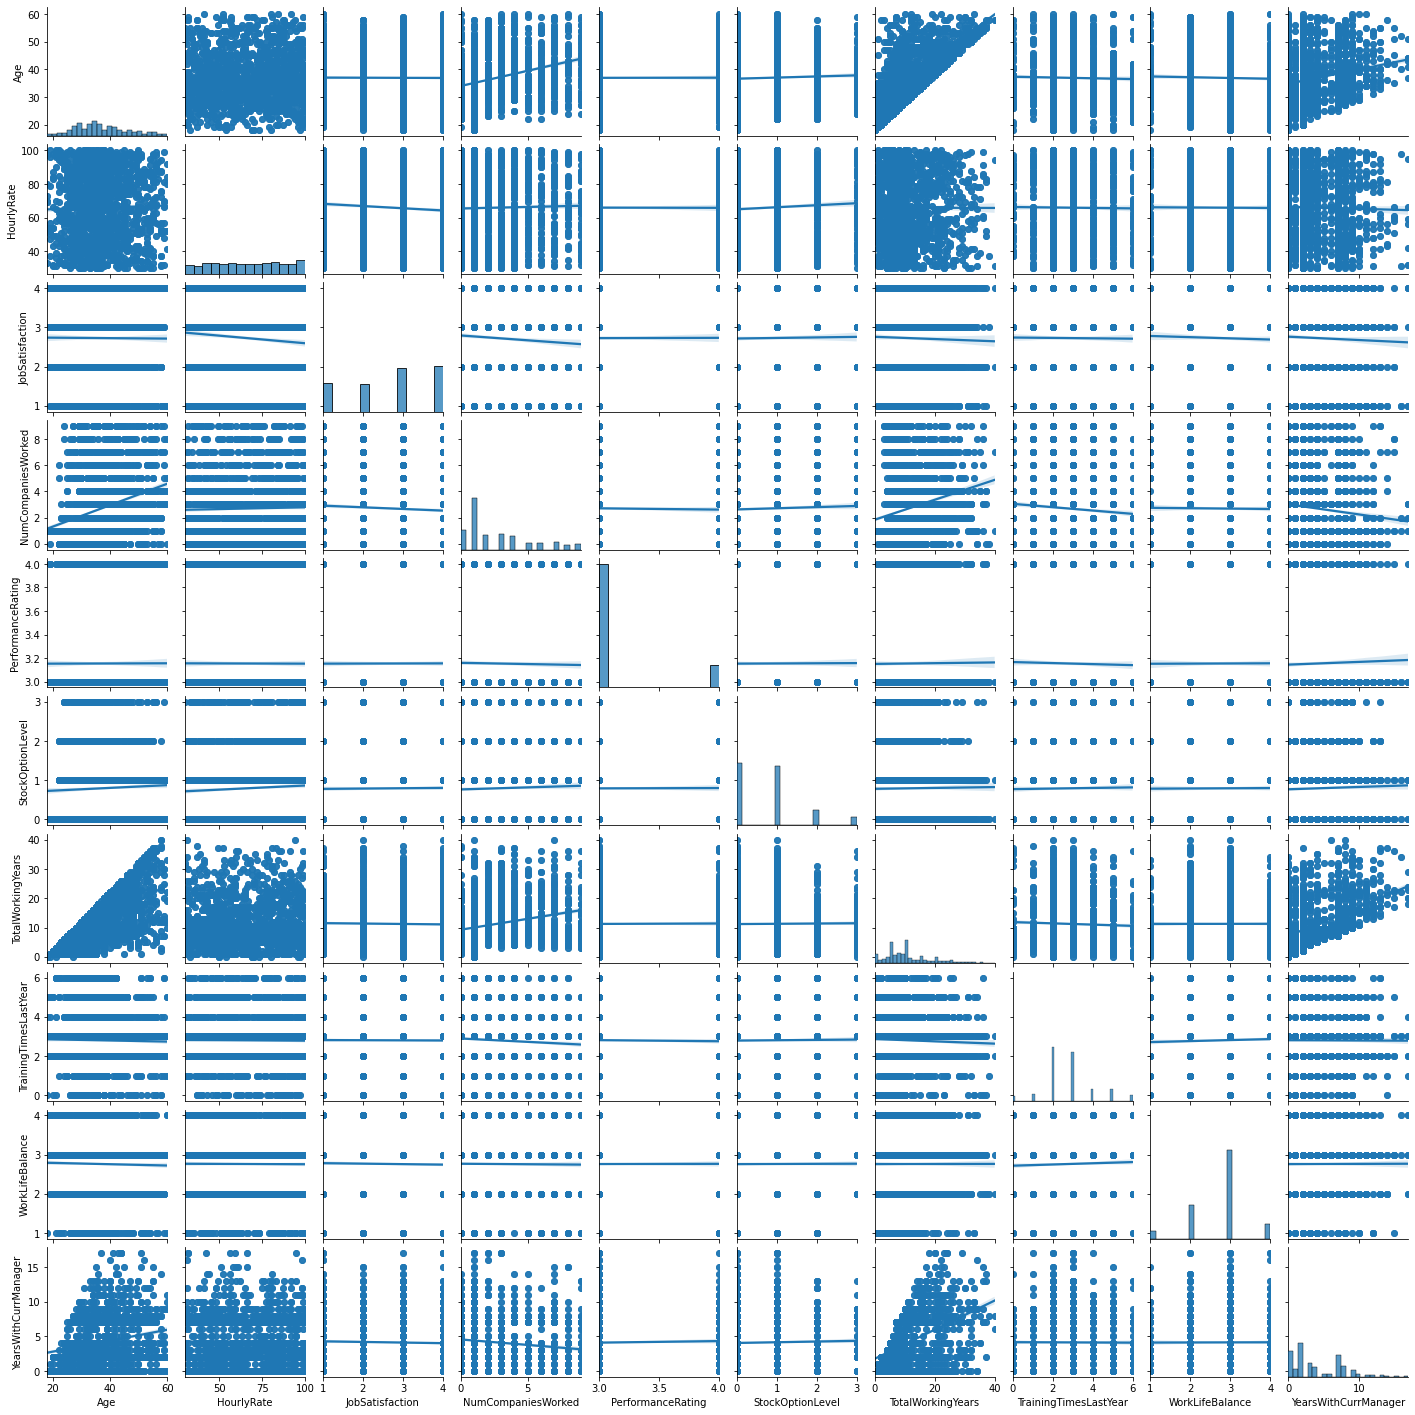

In [64]:
sns.pairplot(df_HR_num2, height = 2, aspect = 1, kind = 'reg', diag_kind = 'hist')
plt.savefig('Pairplot.jpg')
plt.show()

kind parameter (bivariate plot) takes the following arguments:
'scatter', 'kde', 'hist', 'reg'
Default is 'scatter'

diag_kind parameter displays Univariate distribution of the column and takes the following parameters: 
'auto', 'hist', 'kde', None. Default is auto.


In [65]:
df_HR_cat

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...,...
2935,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
2936,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
2937,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
2938,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


In [66]:
df_HR_ft = pd.crosstab(index = df_HR['Department'], columns = [df_HR['Attrition'], df_HR['BusinessTravel']])
df_HR_ft

Attrition                      No                                        Yes  \
BusinessTravel         Non-Travel Travel_Frequently Travel_Rarely Non-Travel   
Department                                                                     
Human Resources                12                14            76          0   
Research & Development        178               290          1188         16   
Sales                          86               112           510          8   

Attrition                                               
BusinessTravel         Travel_Frequently Travel_Rarely  
Department                                              
Human Resources                        8            16  
Research & Development                74           176  
Sales                                 56           120

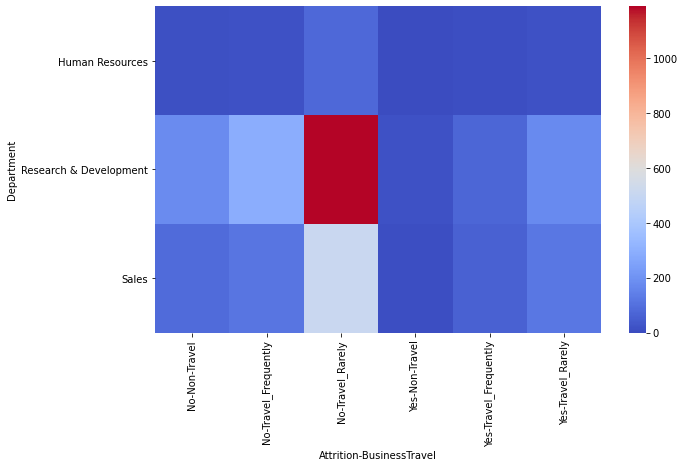

In [138]:
plt.figure(figsize = (10,6))
sns.heatmap(df_HR_ft, cmap = 'coolwarm')
plt.show()

In [67]:
print(dir(pd))

['BooleanDtype', 'Categorical', 'CategoricalDtype', 'CategoricalIndex', 'DataFrame', 'DateOffset', 'DatetimeIndex', 'DatetimeTZDtype', 'ExcelFile', 'ExcelWriter', 'Flags', 'Float32Dtype', 'Float64Dtype', 'Float64Index', 'Grouper', 'HDFStore', 'Index', 'IndexSlice', 'Int16Dtype', 'Int32Dtype', 'Int64Dtype', 'Int64Index', 'Int8Dtype', 'Interval', 'IntervalDtype', 'IntervalIndex', 'MultiIndex', 'NA', 'NaT', 'NamedAgg', 'Period', 'PeriodDtype', 'PeriodIndex', 'RangeIndex', 'Series', 'SparseDtype', 'StringDtype', 'Timedelta', 'TimedeltaIndex', 'Timestamp', 'UInt16Dtype', 'UInt32Dtype', 'UInt64Dtype', 'UInt64Index', 'UInt8Dtype', '__all__', '__builtins__', '__cached__', '__deprecated_num_index_names', '__dir__', '__doc__', '__docformat__', '__file__', '__getattr__', '__git_version__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_config', '_is_numpy_dev', '_libs', '_testing', '_typing', '_version', 'api', 'array', 'arrays', 'bdate_range', 'compat', 'concat

In [68]:
df_HR_num3 = df_HR_num[['Age', 'JobSatisfaction', 'YearsSinceLastPromotion']]
df_HR_num3

,Age,JobSatisfaction,YearsSinceLastPromotion
0,41,4,0
1,49,2,1
2,37,3,0
3,33,3,3
4,27,2,2
...,...,...,...
2935,36,4,0
2936,39,1,1
2937,27,2,0
2938,49,2,0


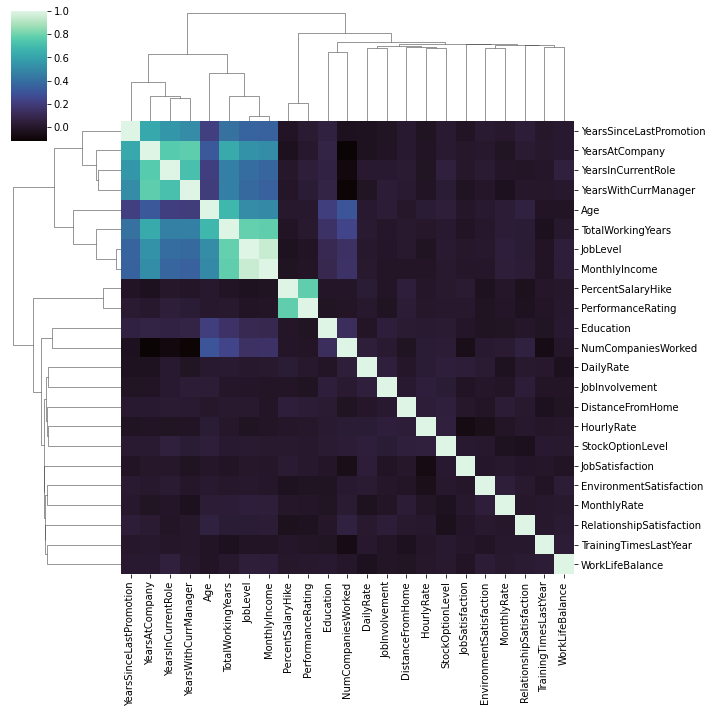

In [76]:
sns.clustermap(data = df_HR_num.corr(), cmap = paletteMakoSeq)
plt.show()

### FacetGrid()

sns.FacetGrid() function which creates a FacetGrid object in seaborn helps in visualizing distribution of one or more variables as well as the relationship between multiple variables using multiple subplots.
FacetGrid object takes a dataframe as input and the names of the variables that will form the row, column, or hue dimensions of the grid. The variables should be categorical and the data at each level of the variable will be used for a facet along that axis.
While data, row and columns are mandatory, hue is optional

In [140]:
print(df_HR.BusinessTravel.unique())
print(df_HR.Department.unique())

['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
['Sales' 'Research & Development' 'Human Resources']


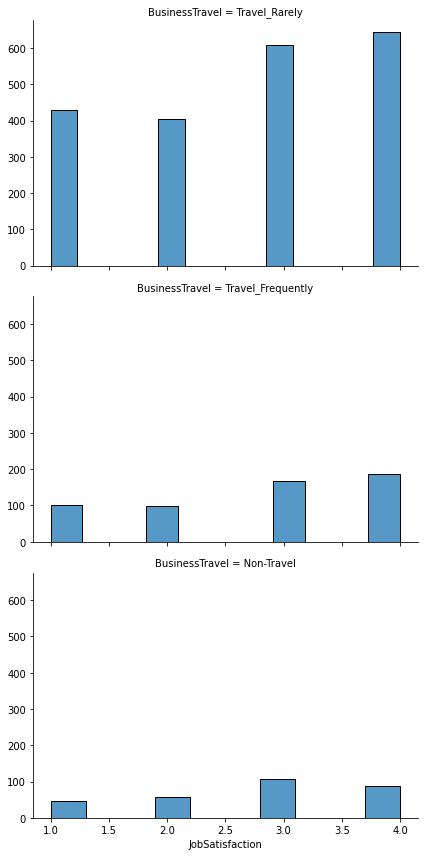

In [149]:
sns.FacetGrid(df_HR, row = 'BusinessTravel', height = 4, \
aspect = 1.5, palette = 'pastel').map(sns.histplot, 'JobSatisfaction')

# Finally, the best plot of them ALL. 

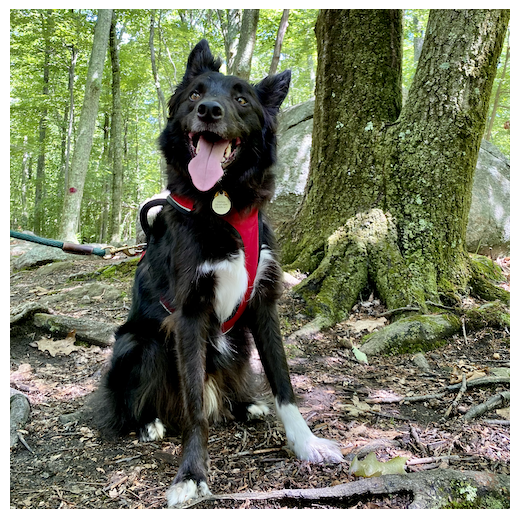

In [147]:
sns.dogplot()

The creators of seaborn put in an Easter egg — call sns.dogplot() and seaborn will randomly return a high-resolution picture of an adorable dog!

In [72]:
print(dir(sns))

['FacetGrid', 'JointGrid', 'PairGrid', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_core', '_decorators', '_docstrings', '_orig_rc_params', '_statistics', 'algorithms', 'axes_style', 'axisgrid', 'barplot', 'blend_palette', 'boxenplot', 'boxplot', 'categorical', 'catplot', 'choose_colorbrewer_palette', 'choose_cubehelix_palette', 'choose_dark_palette', 'choose_diverging_palette', 'choose_light_palette', 'clustermap', 'cm', 'color_palette', 'colors', 'countplot', 'crayon_palette', 'crayons', 'cubehelix_palette', 'dark_palette', 'desaturate', 'despine', 'displot', 'distplot', 'distributions', 'diverging_palette', 'dogplot', 'ecdfplot', 'external', 'factorplot', 'get_data_home', 'get_dataset_names', 'heatmap', 'histplot', 'hls_palette', 'husl_palette', 'jointplot', 'kdeplot', 'light_palette', 'lineplot', 'lmplot', 'load_dataset', 'matrix', 'miscplot', 'mpl', 'mpl_palette', 'pairplot', 'palettes', 'pal

In [73]:
print(dir(df_HR))

['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'T', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', '_AXIS_LEN', '_AXIS_ORDERS', '_AXIS_TO_AXIS_NUMBER', '_HANDLED_TYPES', '__abs__', '__add__', '__and__', '__annotations__', '__array__', '__array_priority__', '__array_ufunc__', '__array_wrap__', '__bool__', '__class__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__divmod__', '__doc__', '__eq__', '__finalize__', '__floor